## Getting 5Fold Accuracy and F1 Score with visualization

Model 1 - This model is trained on 101 classes. We have calculated the top1, top5, top 10 accuracy and F1 score for this model with visualization

In [1]:
from collections import defaultdict
import functools
import keras
import keras.callbacks
import numpy as np
from pathlib import Path
import pandas as pd
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
%matplotlib inline

Using TensorFlow backend.


Number of folds with path to save figures

In [2]:
NUM_FOLDS = 5
FIGURES_PATH = Path('figures')

Function to get Top 10 accuracy for visualization with respect to 5Fold score.

In [3]:
top10_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=10)
top10_acc.__name__ = 'top10_acc'

 We have already saved the y_test and y_pred for all 5-folds for Model1, Model2, and Model3 using pickle(.pkl) file. In this code we reading these file for each model and generating Top1, Top2 and Top3 accuracies and F1 score for visualisation.

In [7]:
## histories = defaultdict(list)
y_tests = defaultdict(list)
y_preds = defaultdict(list)
histories = defaultdict(list)
accuracies = defaultdict(dict)


def top_n_accuracy(y_tests, y_preds, n):
    num_classes = len(y_preds[0])
    top_n_predictions = [y_test in sorted(range(num_classes), key=lambda n: y_pred[n], reverse=True)[:n] for y_pred, y_test in zip(y_preds, y_test)]
    return float(sum(top_n_predictions)) / len(y_tests)


for num_classes in [25,50,101]:
    data_dir = Path(f"{num_classes}_runs")
    for run in range(1, NUM_FOLDS + 1):
        #history = pickle.load((data_dir / f'history_{num_classes}_{run}.pkl').open('rb'))
        y_test = pickle.load((data_dir / f'y_test_{num_classes}_{run}.pkl').open('rb'))
        y_tests[num_classes].append(y_test)
        y_pred = pickle.load((data_dir / f'y_predict_{num_classes}_{run}.pkl').open('rb'))
        y_preds[num_classes].append(y_pred)
    print(f"{num_classes} classes:")
    for n in [1,5,10]:
        avg_topn_accuracy = sum([top_n_accuracy(y_test, y_pred, n) for y_test, y_pred in zip(y_tests[num_classes], y_preds[num_classes])]) / len(y_tests[num_classes])
        print(f"Top {n} accuracy: {avg_topn_accuracy}")
        accuracies[num_classes][n] = avg_topn_accuracy
    f1 = np.mean([f1_score(y_test, np.argmax(y_pred, axis=1), average="macro") for y_test, y_pred in zip(y_tests[num_classes], y_preds[num_classes])])
    print(f"F1 Score: {f1}")
#     if num_classes == 101:
#         print(type(y_preds[num_classes][0][0]))
#     print(np.array(y_preds[num_classes][0]).shape)
#     y_pred_top1_all = np.hstack(np.argmax(np.array(y_preds[num_classes]), axis=2))
#     y_test_all = np.hstack(y_tests[num_classes])
#     print(y_pred_top1_all.shape)
#     print(y_test_all.shape)
#     print(sum(y_pred_top1_all == y_test_all))

    print()
    

25 classes:
Top 1 accuracy: 0.41372
Top 5 accuracy: 0.6916800000000001
Top 10 accuracy: 0.80684
F1 Score: 0.5203463859965595

50 classes:
Top 1 accuracy: 0.34306000000000003
Top 5 accuracy: 0.5952
Top 10 accuracy: 0.70994
F1 Score: 0.43215426579924976

101 classes:
Top 1 accuracy: 0.2223459985441333
Top 5 accuracy: 0.4231270344614302
Top 10 accuracy: 0.5256095886693488
F1 Score: 0.33188679434182033



Generating figure plotting accuracies 

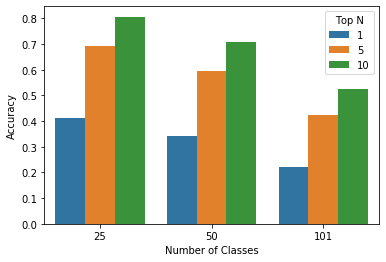

In [8]:
dataset = pd.DataFrame([(num_classes, top_n, accuracy) for num_classes, acc in accuracies.items() for top_n, accuracy in acc.items()], columns=["n_classes", "Top N", "accuracy"])
fig=sns.barplot(x="n_classes", y="accuracy", hue="Top N", data=dataset)
fig.set_ylabel("Accuracy")
fig.set_xlabel("Number of Classes")
fig.get_figure().savefig(FIGURES_PATH / "accuracies.pdf", dpi=800)

In [ ]:
plt = None
for h in histories:
    plt = sns.lineplot([1,2,3,4,5], h.history['accuracy'])
plt.get_figure().show()
plt.get_figure().savefig(FIGURES_PATH / '25_history.pdf')

## 